Galstreams - Utilities and plots guide
============

In this notebook you'll find examples and plots of most galstreams functionalities

In [1]:
import scipy
import pandas as pd
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import galstreams

Instantiating the library
------------------------

First, create a MWStreams object. This will contain all the individual tracks for the streams registered in the library. By default only one track is implemented per stream (some streams have multiple tracks available), this is indicated by the implement_Off keyword being set to False (default). You can change this behaviour by setting it to True.

In [3]:
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)

Initializing galstreams library from master_log... 


The MWStreams object has a summary attribute, which is a Pandas DataFrame with summary information for the library as a whole. It includes information for *all* the available tracks. You can have a look at it with:

In [4]:
mwsts.summary.head(10)

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,dec_f,distance_f,ra_mid,dec_mid,distance_mid,ra_pole,dec_pole,InfoFlags,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,-16.281973,25.126725,298.182168,-29.913159,26.839948,235.758575,38.821881,0000,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,14.448969,14.350060,157.510431,15.343949,15.929409,308.056470,72.509388,1101,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,0.417097,-15.901759,...,-20.427757,24.636741,4.915075,-18.117867,26.923444,64.503226,57.120874,1111,Shipp2018,3
AAU-ATLAS-L21,st,True,AAU-ATLAS-L21,AAU-ATLAS,li2021,Li2021,-,23.561687,8.931901,-21.023379,...,-33.199331,18.525495,20.058646,-26.983189,20.885277,73.360646,49.567099,1111,Koposov2014,4
Acheron-G09,ep,True,Acheron-G09,Acheron,grillmair2009,Grillmair2009,-,36.532092,230.000000,-2.000000,...,21.000000,3.800000,244.604606,10.300419,3.656382,142.339428,49.453184,0000,Grillmair2009,5
ACS-R21,st,True,ACS-R21,ACS,ramos2021,Ramos2021,-,57.664136,154.398418,80.038162,...,23.950045,11.700000,128.518982,52.595600,11.700000,212.301639,-4.733141,1110,Ramos2021,6
Alpheus-G13,st,True,Alpheus-G13,Alpheus,grillmair2013,Grillmair2013,-,24.216058,21.580100,-68.999980,...,-44.999987,2.000008,24.955477,-56.984492,1.800264,301.571407,4.280719,1100,Grillmair2013,7
Aquarius-W11,st,True,Aquarius-W11,Aquarius,williams2011,Williams2011,-,12.374145,338.783199,-7.539446,...,-9.924148,3.342025,344.906423,-8.782390,4.088630,47.762971,70.953629,1111,Williams2011,8
C-19-I21,st,True,C-19-I21,C-19,martin2022,Martin2022,-,29.730751,354.155043,36.115423,...,6.406326,18.000000,354.986332,21.269702,18.000000,85.916944,2.286156,1010,Ibata2021,9


A stream's track is retrieved using the unique TrackName. You can query the MWStreams object to find out the name of the available track(s) for a given stream by providing it's name (or part of it) to the get_track_names_for_stream method. This will retrieve *all* the available TrackNames:

In [5]:
mwsts.get_track_names_for_stream('Pal')

['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

Setting the *On_only*. keyword as True will return only the active track(s) for the all the matching stream name(s)

In [6]:
mwsts.get_track_names_for_stream('Pal', On_only=True)

['Cetus-Palca-T21', 'Pal13-S20', 'Pal15-M17', 'Pal5-PW19', 'Palca-S18']

finally, the track is stored as a SkyCoord object in the track attribute:

In [7]:
mwsts['Pal5-PW19'].track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(242.09382437,  6.88309503, 22.02340828),
     (242.08670244,  6.87558676, 22.02333424),
     (242.07954494,  6.86813405, 22.02325892), ...,
     (224.67592037, -4.79218842, 19.09368606),
     (224.66687368, -4.79668187, 19.09096063),
     (224.65738999, -4.80051508, 19.08823394)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.12850417, -2.34952027, 999.00002274),
     (-2.12922183, -2.34945636, 999.00002274),
     (-2.12993892, -2.34939303, 999.00002274), ...,
     (-2.77331871, -3.06772628, 999.00002188),
     (-2.77323034, -3.0684521 , 999.00002188),
     (-2.77314357, -3.06917651, 999.00002188)]>

Plotting a Stream Track
----------------------

You can make a quick plot of the stream's celestial, distance and proper motions tracks with the plot_5D_tracks_subplots_row function. In the following example we plot the Orphan stream's active track (K19=Koposov et al. 2019) in the galactic coordinate frame by passing it the track object (it can take any SkyCoord object) and the Galactic frame object from astropy.

In [8]:
mwsts.get_track_names_for_stream('Orphan', On_only=True)

['Orphan-K19']

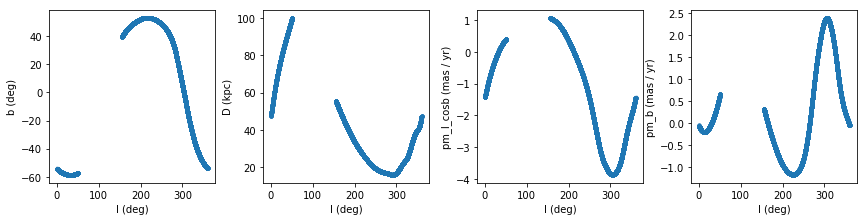

In [9]:
st = 'Orphan-K19'
galstreams.plot_5D_tracks_subplots_row(mwsts[st].track, frame = ac.Galactic(), show_ylabels=True, )
#If you want to make the same plot in equatorial coordinates, use frame = ac.ICRS()

You can also plot it in the stream's coordinate frame stored in the *stream_frame* attribute.

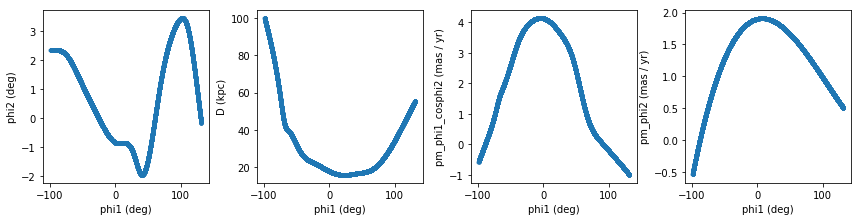

In [10]:
galstreams.plot_5D_tracks_subplots_row(mwsts[st].track, frame = mwsts[st].stream_frame, show_ylabels=True)

The next example shows how to plot the tracks for a list of streams, in the first stream's own reference frame. 

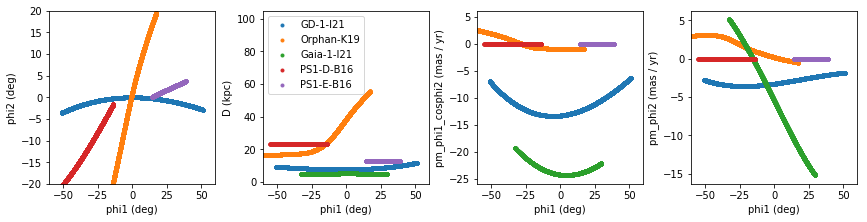

In [11]:
fr = mwsts['GD-1-I21'].stream_frame

fig, axs = plt.subplots(1,4, figsize=(12,3))
plt.tight_layout(pad=1.1, w_pad=1.4)
for st in ['GD-1-I21','Orphan-K19','Gaia-1-I21','PS1-D-B16','PS1-E-B16']:
    scat_kwds = dict(marker='.',label=st)
    galstreams.plot_5D_tracks_subplots_row(mwsts[st].track, frame = fr, axs=axs, show_ylabels=True, scat_kwds=scat_kwds)

for ax in axs:    
    ax.set_xlim(-60,60)    
axs[0].set_ylim(-20,20)  
axs[1].legend()

Radial velocity tracks are also supported, but only a few streams have this information. The last bit of InfoFlags is set to 1 when the information is available. You can list which streams have radial velocities as follows:

In [16]:
for st in mwsts.all_track_names():
 if mwsts.summary.loc[st]["InfoFlags"][3]=='1': print(st)    

300S-F18
AAU-AliqaUma-L21
AAU-ATLAS-L21
Aquarius-W11
Jhelum-a-B19
Jhelum-b-B19
LMS1-M21
LMS1-Y20
Orphan-K19
Tri-Pis-B12


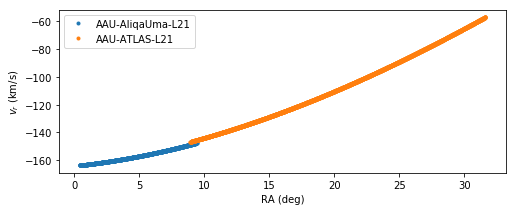

In [25]:
fig = plt.figure(1,figsize=(8,3))
ax = fig.add_subplot(111)
for st in ['AAU-AliqaUma-L21','AAU-ATLAS-L21']:
    ax.plot(mwsts[st].track.ra,mwsts[st].track.radial_velocity,'.', label=st)
ax.legend()
ax.set_xlabel('RA (deg)')
ax.set_ylabel('$v_r$ (km/s)');

Plotting the full Library
--------------------

To plot the entire library you just need to loop over all the active tracks. In this example we annotate each one at the first of the two end points stored in the *end_points* attribute of each track. You could also use the mid_point as attribute as a reference for labelling. Here is a simple Mollweide projection plot in galactic coordinates:

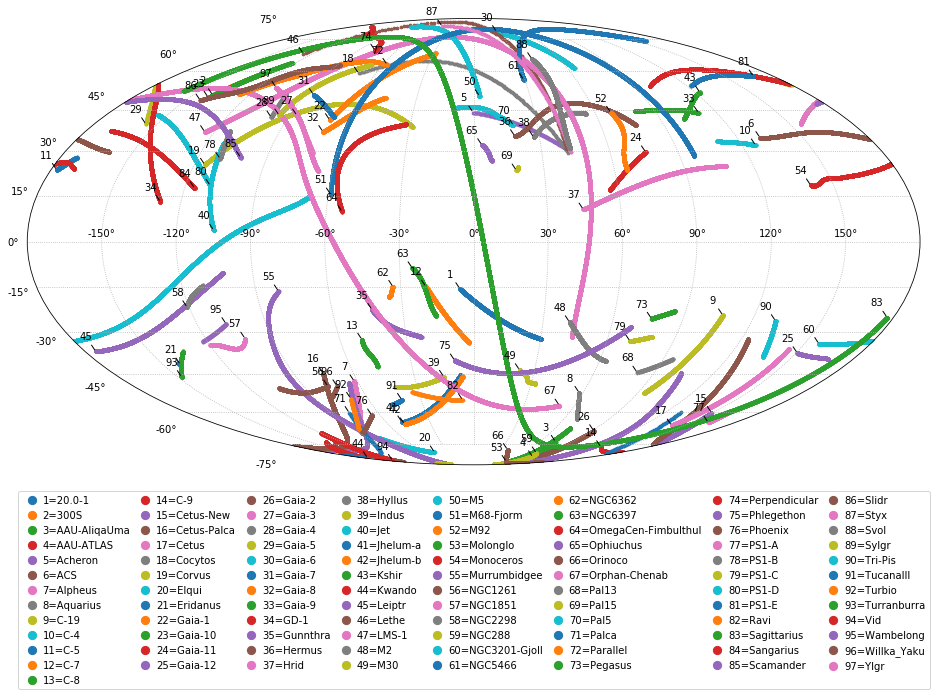

In [13]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')

for st in mwsts.keys():
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))
  #Annotate at one of the end points  
  xo = mwsts[st].end_points.galactic.l.wrap_at(180*u.deg)[0].rad
  yo = mwsts[st].end_points.galactic.b[0].rad  
  ax.annotate(mwsts[st].ID, xy=(xo,yo),
              xycoords='data',
              arrowprops=dict(arrowstyle="-",color='k'),
              horizontalalignment='center', verticalalignment='center', 
              xytext=(-10,15),textcoords='offset points',
              )

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

Because the track is a SkyCoord object, you can easily transform into another reference system. Below Here is a 3D plot in cartesian galactocentric coordinates:

In [15]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

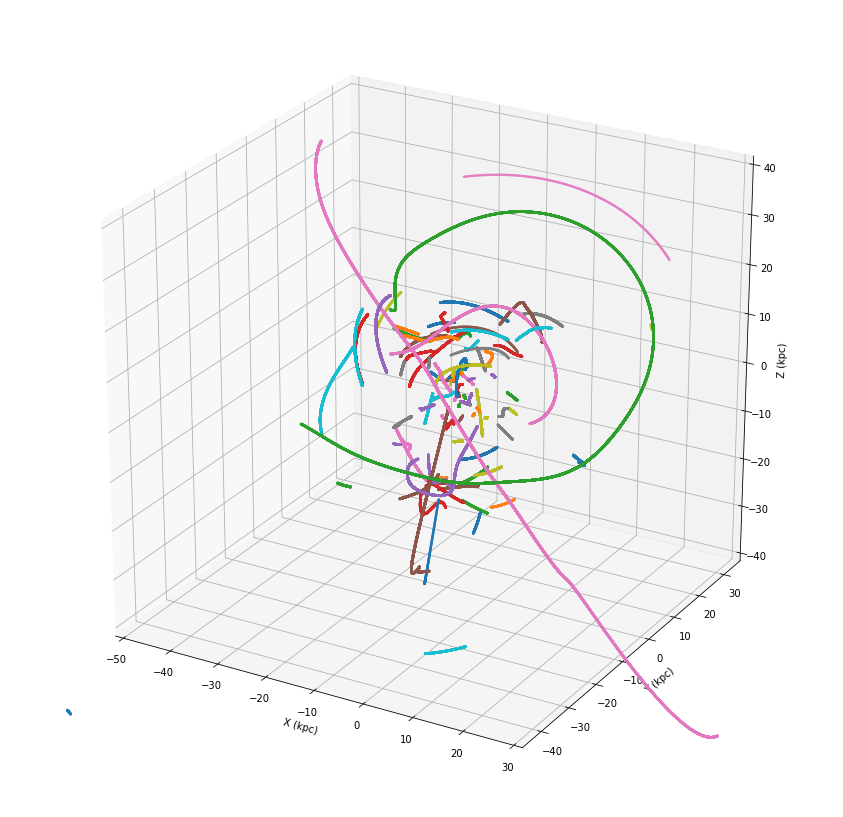

In [16]:
fig = plt.figure(1,figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

gsr = ac.Galactocentric()

j=0
for st in mwsts.keys():
 
  ax.scatter3D(mwsts[st].track.transform_to(gsr).x,mwsts[st].track.transform_to(gsr).y, mwsts[st].track.transform_to(gsr).z,
               marker='.', s=10, c=None, alpha=0.7,
               label="{ID:.0f}={Name}".format(ID=mwsts.summary.ID[st],Name=mwsts.summary.Name[st]))

D = 40.
xo, yo, zo = -10, -5., 0.
ax.set_xlim(xo-D,xo+D)
ax.set_ylim(yo-D,yo+D)
ax.set_zlim(zo-D,zo+D)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

# Point of view
ax.view_init(elev=25., azim=-60.)

fig.subplots_adjust(left=0.02,right=0.98, top=0.98, bottom=0.05)

Polygon Footprints
------------------

If you have a catalogue and would like to select objects within a given width of the track in the sky, you can do this with the polygon footprint utilities. You can also use them to shift the track by a given offset and select stars in a similar area off-stream, to use as a control field, for example.

Text(0, 0.5, 'DEC (deg)')

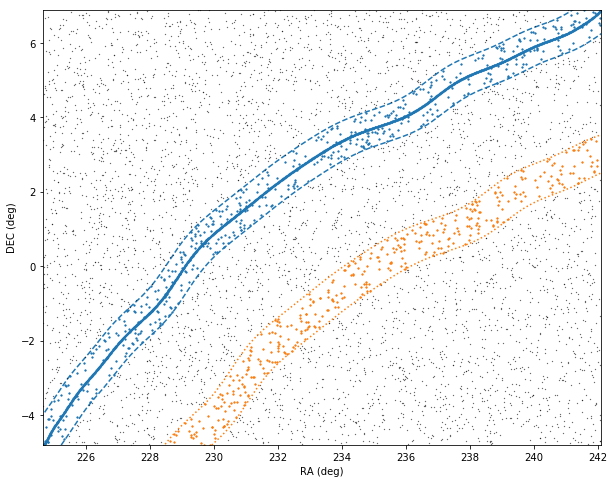

In [17]:
st = "Pal5-PW19"

#Generate random points on the sphere in an area around the track
rao,raf = np.min(mwsts[st].track.ra.deg), np.max(mwsts[st].track.ra.deg)
deco,decf = np.min(mwsts[st].track.dec.deg),np.max(mwsts[st].track.dec.deg)
field_ra, field_dec = galstreams.get_random_spherical_angles(5000,az=[rao,raf],
                                                           lat=[deco,decf],degree=True)
field = ac.SkyCoord(ra=field_ra*u.deg, dec=field_dec*u.deg, frame='icrs')

plt.figure(1,figsize=(10,8))
ax = plt.subplot(111)
#Plot the track
ax.plot(mwsts[st].track.ra, mwsts[st].track.dec, '.', ms=2., color='C0')
#plot the default polygon track stored in the library 
ax.plot(mwsts[st].poly_sc.icrs.ra, mwsts[st].poly_sc.icrs.dec, ls='--', color='C0')
#Random background "field" points 
ax.plot(field.ra, field.dec, 'k.', ms=0.5)

#Select the field points inside the polygon footprint
on = mwsts[st].get_mask_in_poly_footprint(field)
ax.plot(field.ra[on], field.dec[on], '.', ms=2.5, color='C0')

#Create a new polygon footprint off-stream, with a given offset and width, and select field points inside it 
off_poly = mwsts[st].create_sky_polygon_footprint_from_track(width=1.*u.deg, phi2_offset=3.5*u.deg)
off = galstreams.get_mask_in_poly_footprint(off_poly, field, stream_frame=mwsts[st].stream_frame)
#Plot the off-stream polygon footprint and points selected inside it
ax.plot(off_poly.icrs.ra, off_poly.icrs.dec, ls=':', color='C1')
ax.plot(field.ra[off], field.dec[off], '.', ms=2.5, color='C1')

ax.set_xlim(rao,raf)
ax.set_ylim(deco,decf)   
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

Pole and Angular Momentum Tracks
-----------------------------

The library also contains pole tracks for all streams and heliocentric angular momentum tracks for all the streams with proper motion data. Here's an example showing the two tracks, in the heliocentric frame, for four selected stellar streams. The light colored track corresponds to the angular momentum track, the pole track for the same stream has the same color in a dark shade. For more details see [Mateu (2022)](https://arxiv.org/abs/2204.10326).

In [20]:
import seaborn as sns

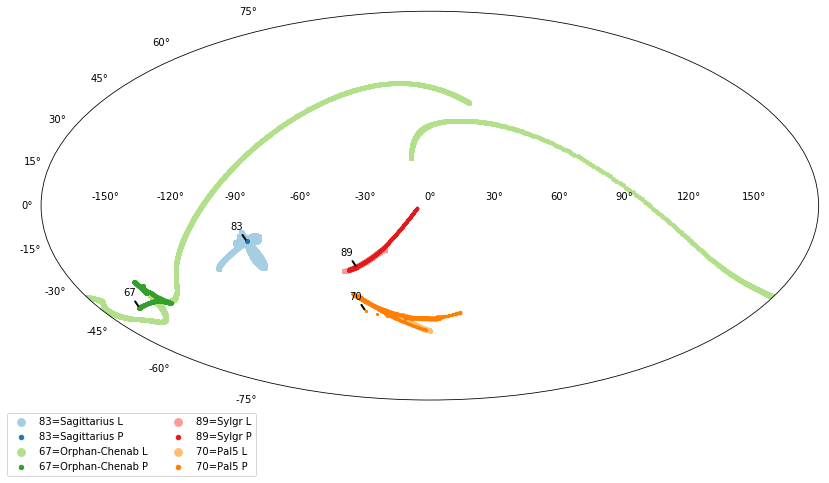

In [21]:
sns.set_palette('Paired')
fig=plt.figure(1,figsize=(12,12))
ax = fig.add_subplot(111, projection='mollweide')

for st in ['Sagittarius-A20','Orphan-K19','Sylgr-I21','Pal5-PW19']:   
   
  ID = mwsts.summary.ID[st]
  name="{ID:.0f}={Name}".format(ID=ID,Name=mwsts.summary.Name[st])
 
  if (mwsts.summary.loc[st,"InfoFlags"][2]!='0'):  

    L_mod, L_b, L_l = mwsts[st].angular_momentum_helio
    
    #L track
    x,y = L_l.wrap_at(180*u.deg).rad, L_b.rad
    ax.scatter(x,y, s=15, label=name+' L')

    #Pole track    
    x,y = mwsts[st].pole_track_helio.galactic.l.wrap_at(180*u.deg).rad, mwsts[st].pole_track_helio.galactic.b.rad
    ax.scatter(x,y, s=5, label=name+' P')
    mid_pole_helio = mwsts[st].mid_pole


    label = "{id:.0F}".format(id=ID)
    xy_stream = (mwsts[st].pole_track_helio.l.rad, mwsts[st].pole_track_helio.b.rad)  
    xy_stream = (x[-1],y[-1])
    ax.annotate(label, xy=xy_stream,  xycoords='data',  #weight="bold",
            xytext=(-10,15), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-", lw=2, color='k'),
            horizontalalignment='center', verticalalignment='center')


    
ax.legend(ncol=2,loc='upper left', markerscale=2., bbox_to_anchor=(-0.05,-0.02))


fig.subplots_adjust(left=0.05,right=0.95, bottom=0.05, top=1.4)

Listing Track and Stream Names
--------------------

A couple utility functions are provided to list all the tracks' names available (all_track_names), all active tracks' names (all_track_names(On_only=True)) and  all the unique stream names available (all_unique_stream_names)

In [9]:
mwsts.all_track_names()

array(['20.0-1-M18', '300S-F18', 'AAU-AliqaUma-L21', 'AAU-ATLAS-L21',
       'Acheron-G09', 'ACS-R21', 'Alpheus-G13', 'Aquarius-W11',
       'C-19-I21', 'C-4-I21', 'C-5-I21', 'C-7-I21', 'C-8-I21', 'C-9-I21',
       'Cetus-New-Y21', 'Cetus-Palca-T21', 'Cetus-Palca-Y21', 'Cetus-Y13',
       'Chenab-S19', 'Cocytos-G09', 'Corvus-M18', 'Elqui-S19',
       'Eridanus-M17', 'Fimbulthul-I21', 'Gaia-1-I21', 'Gaia-10-I21',
       'Gaia-11-I21', 'Gaia-12-I21', 'Gaia-2-I21', 'Gaia-3-M18',
       'Gaia-4-M18', 'Gaia-5-M18', 'Gaia-6-I21', 'Gaia-7-I21',
       'Gaia-8-I21', 'Gaia-9-I21', 'GD-1-I21', 'GD-1-PB18',
       'Gunnthra-I21', 'Hermus-G14', 'Hrid-I21', 'Hyllus-G14',
       'Indus-S19', 'Jet-F22', 'Jet-J18', 'Jhelum-a-B19', 'Jhelum-a-S19',
       'Jhelum-b-B19', 'Jhelum-b-S19', 'Jhelum-I21', 'Kshir-I21',
       'Kwando-G17', 'Leiptr-I21', 'Lethe-G09', 'LMS1-M21', 'LMS1-Y20',
       'M2-G22', 'M2-I21', 'M30-S20', 'M5-G19', 'M5-I21', 'M5-S20',
       'M68-I21', 'Fjorm-I21', 'M68-P19', 'M92-I21', 

In [10]:
#Print active track names only
mwsts.all_track_names(On_only=True)

dict_keys(['20.0-1-M18', '300S-F18', 'AAU-AliqaUma-L21', 'AAU-ATLAS-L21', 'Acheron-G09', 'ACS-R21', 'Alpheus-G13', 'Aquarius-W11', 'C-19-I21', 'C-4-I21', 'C-5-I21', 'C-7-I21', 'C-8-I21', 'C-9-I21', 'Cetus-New-Y21', 'Cetus-Palca-T21', 'Cetus-Y13', 'Cocytos-G09', 'Corvus-M18', 'Elqui-S19', 'Eridanus-M17', 'Gaia-1-I21', 'Gaia-10-I21', 'Gaia-11-I21', 'Gaia-12-I21', 'Gaia-2-I21', 'Gaia-3-M18', 'Gaia-4-M18', 'Gaia-5-M18', 'Gaia-6-I21', 'Gaia-7-I21', 'Gaia-8-I21', 'Gaia-9-I21', 'GD-1-I21', 'Gunnthra-I21', 'Hermus-G14', 'Hrid-I21', 'Hyllus-G14', 'Indus-S19', 'Jet-F22', 'Jhelum-a-B19', 'Jhelum-b-B19', 'Kshir-I21', 'Kwando-G17', 'Leiptr-I21', 'Lethe-G09', 'LMS1-Y20', 'M2-I21', 'M30-S20', 'M5-G19', 'M68-P19', 'M92-I21', 'Molonglo-G17', 'Monoceros-R21', 'Murrumbidgee-G17', 'NGC1261-I21', 'NGC1851-I21', 'NGC2298-I21', 'NGC288-I21', 'NGC3201-P21', 'NGC5466-G06', 'NGC6362-S20', 'NGC6397-I21', 'OmegaCen-I21', 'Ophiuchus-C20', 'Orinoco-G17', 'Orphan-K19', 'Pal13-S20', 'Pal15-M17', 'Pal5-PW19', 'Palca-S

In [11]:
mwsts.all_unique_stream_names()

array(['20.0-1', '300S', 'AAU-ATLAS', 'AAU-AliqaUma', 'ACS', 'Acheron',
       'Alpheus', 'Aquarius', 'C-19', 'C-4', 'C-5', 'C-7', 'C-8', 'C-9',
       'Cetus', 'Cetus-New', 'Cetus-Palca', 'Cocytos', 'Corvus', 'Elqui',
       'Eridanus', 'GD-1', 'Gaia-1', 'Gaia-10', 'Gaia-11', 'Gaia-12',
       'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'Gaia-6', 'Gaia-7',
       'Gaia-8', 'Gaia-9', 'Gunnthra', 'Hermus', 'Hrid', 'Hyllus',
       'Indus', 'Jet', 'Jhelum-a', 'Jhelum-b', 'Kshir', 'Kwando', 'LMS-1',
       'Leiptr', 'Lethe', 'M2', 'M30', 'M5', 'M68-Fjorm', 'M92',
       'Molonglo', 'Monoceros', 'Murrumbidgee', 'NGC1261', 'NGC1851',
       'NGC2298', 'NGC288', 'NGC3201-Gjoll', 'NGC5466', 'NGC6362',
       'NGC6397', 'OmegaCen-Fimbulthul', 'Ophiuchus', 'Orinoco',
       'Orphan-Chenab', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E',
       'Pal13', 'Pal15', 'Pal5', 'Palca', 'Parallel', 'Pegasus',
       'Perpendicular', 'Phlegethon', 'Phoenix', 'Ravi', 'Sagittarius',
       'Sangarius', 'Scamande

For a list of the MWStreams attributes and methods available, use the help:

In [7]:
help(mwsts)

Help on MWStreams in module galstreams object:

class MWStreams(builtins.dict)
 |  MWStreams(verbose=False, implement_Off=False)
 |  
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Method resolution order:
 |      MWStreams
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, verbose=False, implement_Off=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  all_active_track_names(self)
 |      Returns an array with all the TrackNames set as 'On' in the library
 |      
 |      Returns
 |      =======
 |      
 |      array
 |  
 |  all_track_na